In [1]:
%cd ..

/home/fedora/Jupyter/river-profiles


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# The `math`-module

## Step Function
Here is the realisation of the conept of [step function](https://en.wikipedia.org/wiki/Step_function).

### step_function
The step function $\nu$ should look like:
$$
\nu(\tau) = 
\begin{cases}
\nu_0,\; \tau < \tau_0 \\
\nu_i,\; \tau_{i-1} < \tau < \tau_i, \; i = 1, ..., k-1\\
\nu_k,\; \tau > \tau_k
\end{cases}
$$
We can use the `step_function` from the `math`-module to calculate

    Parameters:
    -----------
    x : float or float array
        The argument of the function
    
    borders : list of floats len N
        The points, when the function changes the value
    
    values: list of floats len N+1
        values[0] corresponds to the function value before borders[0]
        values[i] corresponds to the function value between borders[i-1] and borders[i]
        
    Returns:
    --------
    r : float or float array shape x.shape

### step integral


For $\tau$ such that $\tau_i \leq \tau < \tau_{i+1}$ the integral of stair function $\nu$ will be:
$$
\int\limits_{\tau_0}^\tau \nu(t) dt = \sum\limits_{j=1}^i \nu_j(\tau_j - \tau_{j-1}) + \nu_{i+1}(\tau - \tau_i)
$$
to calculate $\int\limits_{t_0}^{t_1} \nu(t) dt$ using the `step_integral` from the `math`-module

    Parameters:
    -----------
    x : float or float array
        The argument of the function
    
    borders : list of floats len N
        The points, when the function changes the value
    
    values: list of floats len N+1
        values[0] corresponds to the function value before borders[0]
        values[i] corresponds to the function value between borders[i-1] and borders[i]
        
    negative_backward: bool
        Set I(x0, x1) = -I(x1, x0) for cases, when x0 > x1 
        
    Returns:
    --------
    r : float or float array shape x.shape

In [3]:
from src.math import step_function, step_integral

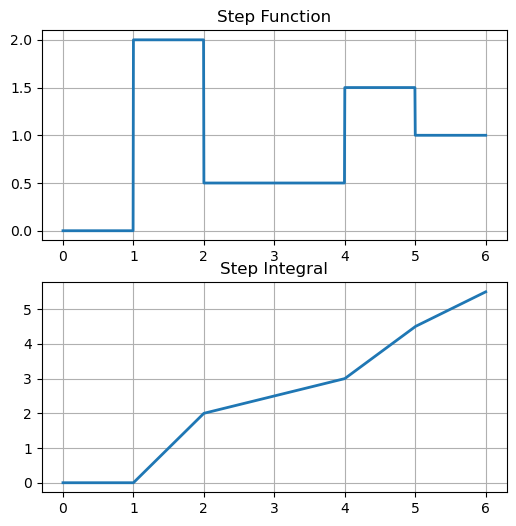

In [4]:
# define the step borders and values
borders = [1, 2, 4, 5]
values = [0, 2, 0.5, 1.5, 1]

x = np.linspace(0, 6, 1201)

# find the step function values
yf = step_function(x, borders, values) 

# find the definie integral of step function in the area [0, x]
yi = step_integral(0, x, borders, values) 

# plot the result
fig, axs = plt.subplots(2)
fig.set_figheight(6)
fig.set_figwidth(6)
axs[0].set_title('Step Function')
axs[0].plot(x, yf, linewidth=2)
axs[1].set_title('Step Integral')
axs[1].plot(x, yi, linewidth=2)
axs[0].grid(True)
axs[1].grid(True)
plt.show()

We alco can use these functions for many dimensional `x0` and `x1`.

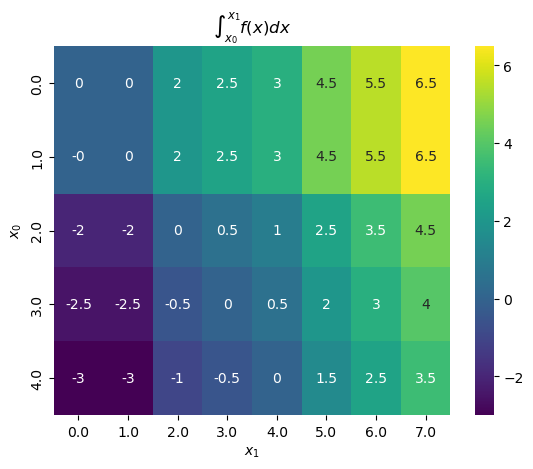

In [5]:
# define 2-dimensional x0 and x1
n = 5
m = 8
x0 = np.arange(n).reshape([n, 1])*np.ones([n, m])
x1 = np.arange(m).reshape([1, m])*np.ones([n, m])

# find the definie integral of step function in the area [x0, x1]
int_vals = step_integral(x0, x1, borders=borders, values=values) 

# plot the result
plt.title(r'$\int_{x_0}^{x_1} f(x) dx$')
sns.heatmap(pd.DataFrame(int_vals, 
                         columns=pd.Index(x1[0], name='$x_1$'), 
                         index=pd.Index(x0[:, 0], name='$x_0$')), 
            annot=True, cmap='viridis')
plt.show()

## `solve_bisect`
To find the solution of nonlinear equation $f(x) = 0$ where $f(x)$ is monotonic on the area $[x_0, x_1]$ and $f(x0)$ and $f(x_1)$ have different signs we can use the [Bisection recursive solve method](https://en.wikipedia.org/wiki/Bisection_method), realised in the `solve_bisect` function of `math`-module:

    Parameters:
    -----------
    f : function, takes float or np.array as argument
    
    x0, x1: float or np.array same shape, as f-argument should be
    
    xtol: float
        The calculation will terminate if the relative error between two consecutive iterates is at most xtol.
    
    maxiter: int
        Maximal number of iterations
    
    iteration : int
        Iteration number
    
    Returns:
    --------
    float or np.array same shape, as x0 and x1

In [6]:
from src.math import solve_bisect

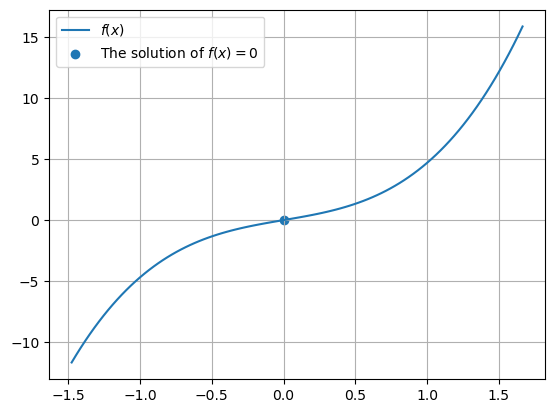

In [7]:
# The monotonic unction on some area
f = lambda x: 2*np.cos(x - 0.5*np.pi) + 3*x**3

# define area borders
x0 = +0.53*np.pi
x1 = -0.47*np.pi

# find the solution
x = solve_bisect(f, x0, x1)

# plot the function and the solution
plt.plot(np.linspace(x0, x1, 100), f(np.linspace(x0, x1, 100)), label='$f(x)$')
plt.scatter(x, 0, label='The solution of $f(x)=0$')
plt.grid(True)
plt.legend()
plt.show()

We also can use this function with higher dimensional tensors, containing nan-values (nan-values will be ignored)

In [8]:
# define the x0 and x1 as arrays with nan-values
x0 = +np.pi/2*np.linspace(0.1, 0.9, 10) - 0.1
x1 = -np.pi/2*np.linspace(0.1, 0.9, 10) 
x0 = np.append(x0, 1.7)
x1 = np.append(x1, np.nan)

# find the solution
x = solve_bisect(f, x0, x1)

# the table of solutions
pd.DataFrame({'x0': x0, 'x1': x1, 'x': x, 'f(x)': f(x)})

,x0,x1,x,f(x)
0,0.057080,-0.157080,3.026235e-10,6.052471e-10
1,0.196706,-0.296706,-1.863576e-10,-3.727151e-10
2,0.336332,-0.436332,5.129108e-10,1.025822e-09
3,0.475959,-0.575959,1.463914e-09,2.927829e-09
4,0.615585,-0.715585,-1.803810e-09,-3.607620e-09
5,0.755211,-0.855211,-2.215905e-09,-4.431811e-09
6,0.894838,-0.994838,2.489008e-09,4.978015e-09
7,1.034464,-1.134464,-1.678419e-09,-3.356838e-09
8,1.174090,-1.274090,-1.165246e-09,-2.330492e-09
9,1.313717,-1.413717,-3.052992e-09,-6.105984e-09


# The `SlopePatches` class of `slope_patches`-module

The slope patches are needed to understand the evolution of river profiles, given by formula
$$
\cfrac{\partial\lambda}{\partial\tau} + (\cfrac{\partial\lambda}{\partial\chi})^n = \nu(\tau, \chi)
$$
where the function $\nu$ is $\chi$-independent step function.

The concept of slope patches is described in the [article](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/jgrf.20031) by Leigh Royden and J. Taylor Perron.

The `SlopePatches` object is the tool to work with slope patches: understanding the parameters of distinct patches and stretch zones, and calculating the elevation of the river.

In [9]:
from src.slope_patches import SlopePatches

## `SlopePatches`-parameters and `SlopePatches.__init__`

The parameters of the `SlopePatches` class are similar to `__init__`-arguments:

    Atributes:
    ----------
    patch_starts - float array length N > 0 (let N be the number of patches; It's not used in code itself)
        The times tau_i, when i-th patch starts
    
    uplift_rates - float array length N
        The values nu_i, uplift rate of the i-th patch (correspondes tau between tau_i and tau_{i+1})

    n - float
        The exponent on channel slope

## `SlopePatches.count`
Thie method returns the number of patches `len(patch_starts)`. Let's call this number $N$.

In [10]:
# define the patches starts, the corresponding uplift rates and the exponent on channel slope
patch_starts = [0.0, 1.0, 5.0, 8.5]
uplift_rates = [2.1, 0.4, 1.9, 0.6]
n = 0.66

# create SlopePatches object
sp = SlopePatches(patch_starts, uplift_rates, n)

# look at the number of patches
N = sp.count()
print(f'The number of patches is {N}')

assert N == len(patch_starts)
assert N == len(uplift_rates)

The number of patches is 4


## Slopes
The $i$-th slope patch should be a segment of solution of an equation, associated with period $[\tau_i, \tau_{i+1})$, corresponding uplift rate $\nu_i$ and the slope value $\sigma_i = \nu_i^{1/n}$.

We can get this values using `SlopePatches.get_slopes`-method.

In [11]:
sp.get_slopes()

array([3.07759206, 0.24949428, 2.64456314, 0.46117476])

## Theoretical Patch Spatial Borders 
The slope patch should is given by its borders. The right border is associated with the equation (B7) form the article by Leigh Royden and J. Taylor Perron:
$$
\chi_{R, i}(\tau) = n\nu_i^{(n - 1)/n} (\tau_i)
$$
If we suppose, that the first patch correspond the initial value, we should set $\chi_{R, 0} = +\infty$.

I'll realise right border $\chi_{R, i}$ caluculation in the `SlopePatches.get_rights` method.

To define left brders we can easily define the spatial length of patch by taking their right border in the maximal time moment corresponding to the patch:
$$
\Delta_i = \chi_{R, i}(\tau_{i+1}) = n\nu_i^{(n - 1)/n} (\tau_{i+1} - \tau_i)
$$
so the left border will be:
$$
\chi_{L, i}(\tau) = \chi_{R, i}(\tau) - \Delta_i
$$

I'll realise spatial patch length $\Delta_i$ in the `SlopePatches.get_lengths` method, and left border $\chi_{L, i}$ caluculation in the `SlopePatches.get_lefts` method.


In [12]:
# define the moment of tau
tau = 6

# calculate left theoretical borders of patches
chi_l = sp.get_lefts(tau)
# calculate right theoretical borders of patches
chi_r = sp.get_rights(tau)

# represent the result as a table
pd.DataFrame({'Left': chi_l, 'Right': chi_r})

,Left,Right
0,2.25176,inf
1,1.05814,5.290702
2,0.00000,0.474180
3,NaN,NaN


We also can calculate theoretical left and right patch borders for an array of times

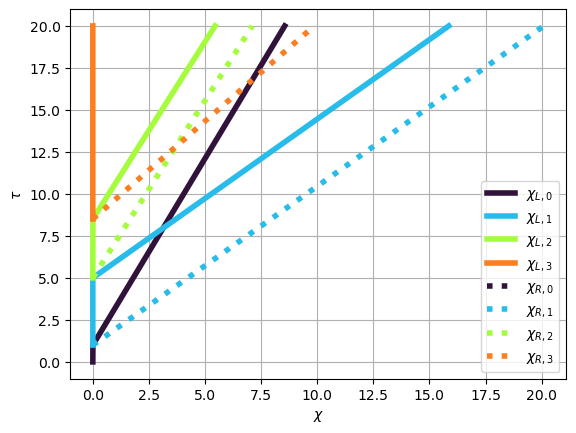

In [17]:
# define the moments of tau
tau = np.arange(-2, 20, 0.01)

# calculate left theoretical borders of patches
chi_l = sp.get_lefts(tau)
# calculate right theoretical borders of patches
chi_r = sp.get_rights(tau)

# plot
for i in range(sp.count()):
    color = cm.turbo(i/sp.count())
    plt.plot(chi_l[i], tau, linewidth=4, linestyle='-', color=color, label=f'$\chi_{{L, {i}}}$')
for i in range(sp.count()):
    color = cm.turbo(i/sp.count())
    plt.plot(chi_r[i], tau, linewidth=4, linestyle=':', color=color, label=f'$\chi_{{R, {i}}}$')
plt.legend()
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\tau$')
plt.grid(True)
plt.show()

## Patches Elevation
The evaluation of the patch $i$ is given in the equation (B4) form the article by Leigh Royden and J. Taylor Perron:
$$
\lambda_i(\tau, \chi) = \chi\sigma_i + \int\limits_{\tau_i}^\tau [\nu(t) - \nu_i]dt
$$
where $\chi_{L, i} \le \chi < \chi_{R, i}$.

I'll reslise evaluation $\lambda_i(\tau, \chi)$ in the `SlopePatch.get_elevation` method.

